<img src="fireblaze.jpg" width=250 height=200 />

## <p style="font-family: Arial; font-size:1.4em;color:red; style='background :yellow'"> Assignment</p>


### The problem statement

* **Classify the private and public universities by using K-Means clustering**

<span style='color:Red'> **About The Dataset** </span>

* **private:** A factor with levels No and Yes indicating private or public university.

* **apps:** Number of applications received.

* **accept:** Number of applications accepted. 

* **enroll:** Number of new students enrolled.  

* **top10perc:** Pct. new students from top 10% of H.S. class.

* **top25perc:** Pct. new students from top 25% of H.S. class.

* **f_undergrad:** Number of full-time undergraduates.

* **p_undergrad:** Number of part time undergraduates. 

* **outstate:** Out-of-state tuition.

* **room_board:** Room and board costs

* **Books:** Estimated book costs

* **Personal:**	Estimated personal spending

* **PhD:** Pct. of faculty with Ph.D.’s

* **Terminal:**	Pct. of faculty with terminal degree

* **S.F.Ratio:** Student/faculty ratio

* **perc.alumni:**	Pct. alumni who donate

* **Expend:** Instructional expenditure per student

* **Grad.Rate:** Graduation rate

<span style='color:Blue'> **Import the Required Libraries** </span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<span style='color:Blue'> **Question - 1. Review the data sets and view the top lines.** </span>

In [2]:
df=pd.read_csv('college_data.csv')
df.head(10)

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
0,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
6,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


# 1. Exploratory data analysis

<span style='color:Blue'> **Question - 2. Explore the data to gain insights about the data.** </span>


In [3]:
df.shape

(777, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      777 non-null    object 
 1   apps         777 non-null    int64  
 2   accept       777 non-null    int64  
 3   enroll       777 non-null    int64  
 4   top10perc    777 non-null    int64  
 5   top25perc    777 non-null    int64  
 6   f_undergrad  777 non-null    int64  
 7   p_undergrad  777 non-null    int64  
 8   outstate     777 non-null    int64  
 9   room_board   777 non-null    int64  
 10  books        777 non-null    int64  
 11  personal     777 non-null    int64  
 12  phd          777 non-null    int64  
 13  terminal     777 non-null    int64  
 14  s_f_ratio    777 non-null    float64
 15  perc_alumni  777 non-null    int64  
 16  expend       777 non-null    int64  
 17  grad_rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

In [5]:
df.describe()

,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [6]:
df.private.value_counts()

Yes    565
No     212
Name: private, dtype: int64

<span style='color:Blue'> **Question - 5.How to verify missing values within variables and any missed count it.**</span>

In [7]:
df.isnull().sum()

private        0
apps           0
accept         0
enroll         0
top10perc      0
top25perc      0
f_undergrad    0
p_undergrad    0
outstate       0
room_board     0
books          0
personal       0
phd            0
terminal       0
s_f_ratio      0
perc_alumni    0
expend         0
grad_rate      0
dtype: int64

# 2. Exploratory Data Analysis (EDA)

<span style='color:Blue'> **Question - 6. How many students give the room based on grade. Plot the scatter plot and classify based on universities.**</span>

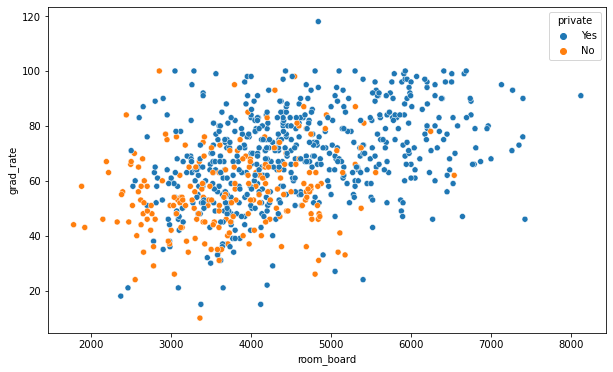

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='room_board', y='grad_rate', data=df, hue='private')
plt.show()

<span style='color:Blue'> **Question - 7. How many students he/she out side station and join the full time undergraduates,plot the scatter plot based on unversities.**</span>

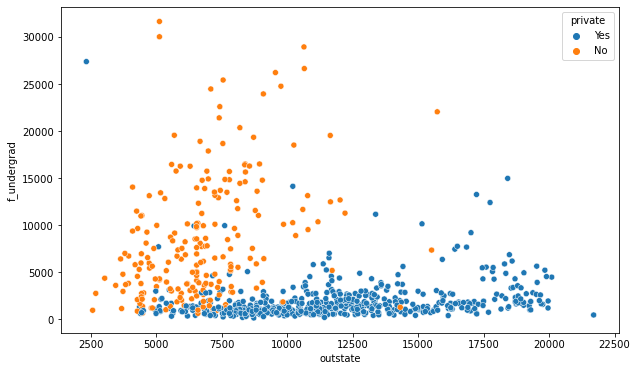

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='outstate', y='f_undergrad', data=df, hue='private')
plt.show()

<span style='color:Blue'> **Question - 8. Plot the sctter plot of private vs non private universities based on outstate students.**</span>

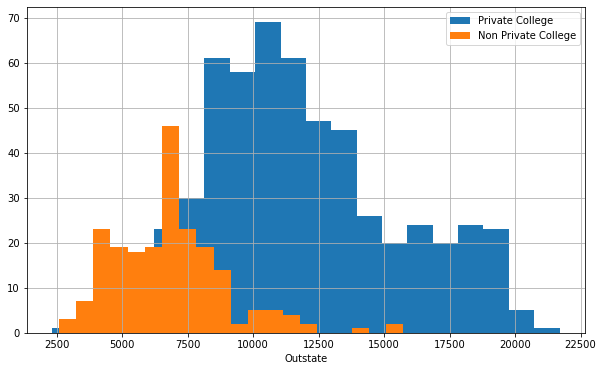

In [18]:
plt.figure(figsize=(10, 6))

df.loc[df.private == 'Yes', 'outstate'].hist(label="Private College", bins=20)
df.loc[df.private == 'No', 'outstate'].hist(label="Non Private College", bins=20)

plt.xlabel('Outstate')
plt.legend()
plt.show()

<span style='color:Blue'> **Question - 9. Plot the scatter plot based on grid rate vs private and non-private college.**</span>

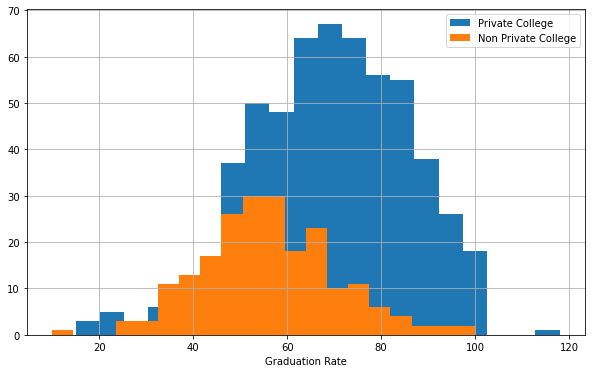

In [19]:
plt.figure(figsize=(10, 6))

df.loc[df.private == 'Yes', 'grad_rate'].hist(label="Private College", bins=20)
df.loc[df.private == 'No', 'grad_rate'].hist(label="Non Private College", bins=20)

plt.xlabel('Graduation Rate')
plt.legend()
plt.show()

<span style='color:Blue'> **Question - 10. What is the name of that school who seems to be a private school with graduation rate of higher than 100%..**</span>

In [20]:
df.loc[df.grad_rate > 100]

,private,apps,accept,enroll,top10perc,top25perc,f_undergrad,p_undergrad,outstate,room_board,books,personal,phd,terminal,s_f_ratio,perc_alumni,expend,grad_rate
95,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


<span style='color:Blue'> **Question - 11. Given data is in same range or not. If not how to arange?.**</span>

In [ ]:
#write observation and code here

#### <span style='color:Blue'> **Question - 12. Do the histogram visualization grade rate vs private and non-private college**</span>

In [ ]:
#write observation and code here

#### <span style='color:Blue'> **Question - 13. Check the relation between the number of application recieved vs number of application accepted**</span>

In [ ]:
#write observation and code here

#### <span style='color:Blue'> **Question - 14.Convert the categorical variable to numerical**</span>

In [ ]:
#write observation and code here

#### <span style='color:Blue'> **Question - 15.What is the highest grade rate**</span>

In [ ]:
#write observation and code here

#### <span style='color:Blue'> **Question - 16.Transorm your data with any transformation technique**</span>

In [ ]:
#write observation and code here

#### <span style='color:Blue'> **Question - 17.What is the highest room / board class**</span>

In [ ]:
#write observation and code here

# 3. Clustering Model

<span style='color:Blue'> **Import the clustering Libraries** </span>

In [23]:
from sklearn.cluster import KMeans

<span style='color:Blue'> **Question - 18. Train the clustering model and Fit the model to all the data except for the Private label.**</span>

In [25]:
model = KMeans (n_clusters = 2)
model.fit(df.drop('private', axis = 1))

KMeans(n_clusters=2)

<span style='color:Blue'> **Question - 19. Find out best value of K by using graph**</span>

In [27]:
model.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

# 4. Evaluation

<span style='color:Blue'> **Question - 20. Is it perfectly classified? If yes how to evaluate? Which method used?**</span>

In [ ]:
#write observation and code here

<span style='color:Blue'> **Question - 21. What is f1-score?**</span>

In [ ]:
#write observation and code here

# 5. Improve the Accuracy

<span style='color:Blue'> **Question - 22. What was the best 'K' value? Use these values and train the model?**</span>

In [ ]:
#write observation and code here

<span style='color:Blue'> **Question - 23. What are the cluster center vectors?**</span>

In [ ]:
#write observation and code here

<span style='color:Blue'> **Question - 24. Indentify the summary of prediction results.**</span>

In [ ]:
#write observation and code here

<span style='color:Blue'> **Question - 25. It is possible to seperate out the dataset in two different classes?**</span>

NOTE:- Create a two seperate clusters based on class.

In [ ]:
#write observation and code here